# Тестовое задание

### Загрузка необходимых библиотек 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Загрузка датасета

In [2]:
df = pd.read_csv('superstore2011-2014.csv', sep=';', index_col=0)
df.head(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
Row ID,,,,,,,,,,,,,,,,,,,,,
1,AG-2011-2040,01.01.2011,06.01.2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
2,IN-2011-47883,01.01.2011,08.01.2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
3,HU-2011-1220,01.01.2011,05.01.2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
4,IT-2011-3647632,01.01.2011,05.01.2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
5,IN-2011-47883,01.01.2011,08.01.2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


### Выполнение тестового задания 

###### 1. Третий город по наибольшей прибыли за весь период

In [3]:
# группировка датасета по городу, после чего суммирование столбца, иллюстрирущего прибыль 
grouped_cities = df.groupby('City')['Profit'].sum()
# сортировка полученных городов с прибылью по убыванию
pd.DataFrame(grouped_cities.sort_values(ascending=False).head(3))

,Profit
City,
New York City,61713.7563
Los Angeles,30285.3229
Seattle,29156.0967


###### 2. Город в России с наименьшей прибылью за весь период 

In [4]:
# сортировка датасета так, чтобы остались только позиции со страной "Россия"
russia_cities = df.loc[df['Country'] == 'Russia']
# группировка датасета по городу в России и сортировка по продажам
grouped_cities_russia = russia_cities.groupby('City')['Sales'].sum()
pd.DataFrame(grouped_cities_russia.sort_values().head(5))

,Sales
City,
Obninsk,10.56
Toguchin,54.18
Nal'chik,74.22
Khasavyurt,81.42
Birobidzhan,244.08


###### 3. Товар с наибольшей прибылью в 2011 году 

In [5]:
# конвертация даты заказа в удобоваримый формат
df['Order Date'] = pd.to_datetime(df['Order Date'])
# сортировка по дате заказа (2011 год)
df_2011 = df.loc[df['Order Date'].dt.year == 2011]
# группировка датасета по названию товара и сортировка по прибыли
pd.DataFrame(df_2011.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(5))

,Profit
Product Name,
Ibico EPK-21 Electric Binding System,4630.4755
"Cisco Smart Phone, with Caller ID",4066.8580
"Nokia Smart Phone, Cordless",3880.1850
"Samsung Smart Phone, VoIP",3414.3100
"Office Star Executive Leather Armchair, Black",3192.4488


###### 4. Год с наименьшим количеством заказов в категории "Furniture" в Калифорнии

In [6]:
# сортировка по штату Калифорния
df_california = df.loc[df['State'] == 'California']
# удаление иных категорий, кроме 'Furniture' из сортированного датасета
df_california = df_california.drop(df_california[df_california['Category'] != 'Furniture'].index)
# создание столбца с указанием года заказа
df_california['Year'] = df_california['Order Date'].dt.year
# группировка по году, подсчет количества уникальных заказов и итоговая сортировка по заказам
pd.DataFrame(df_california.groupby('Year')['Order ID'].nunique().sort_values())

,Order ID
Year,
2012,75
2011,80
2013,98
2014,120


###### 5. Категория товаров в Техасе с положительной прибылью за весь период 

In [7]:
# сортировка по штату Техас
df_texas = df.loc[df['State'] == 'Texas']
# группировка по категории товара и подсчет суммы прибыли по категориям, итоговая сортировка по прибыли
pd.DataFrame(df_texas.groupby('Category')['Profit'].sum().sort_values(ascending=False))

,Profit
Category,
Technology,3291.0252
Furniture,-10432.4223
Office Supplies,-17765.8676


###### 6. Тренд количества проданных товаров Xerox в 2012 году

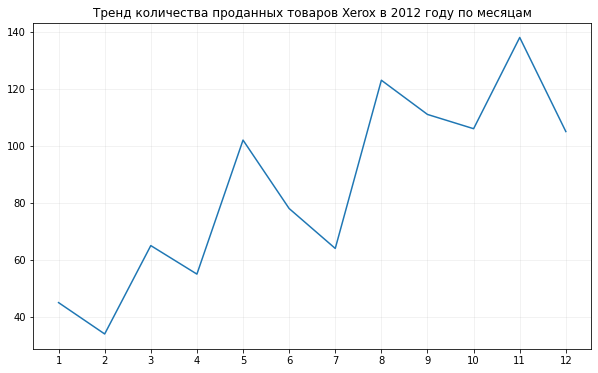

In [8]:
# сортировка по дате заказа (2012 год)
df_2012 = df.loc[df['Order Date'].dt.year == 2012]
# поиск товаров Xerox
df_xerox = df_2012.loc[df['Product Name'].str.contains('Xerox')].copy()
# создание столбца с месяцем
df_xerox['Month'] = df_xerox['Order Date'].dt.month
# построение графика тренда количества проданных товаров по месяцу
plt.figure(figsize=(10,6))
plt.plot(np.arange(1, 13, 1), pd.DataFrame(df_xerox.groupby('Month')['Quantity'].sum()))
plt.xticks(ticks=np.arange(1, 13, 1))
plt.grid(alpha=0.2)
plt.title('Тренд количества проданных товаров Xerox в 2012 году по месяцам')
plt.show()

###### 7. Часть покупателей, сделавших более одного заказа в 2011 году 

In [9]:
# сортировка по году
df_customers = df.loc[df['Order Date'].dt.year == 2011]
# подсчет количества заказов у каждого покупателя
df_total_orders = pd.DataFrame(df_customers.groupby('Customer ID')['Order ID'].count())
print('Доля покупателей, сделавших более одного заказа, равна:', 
      round(len(df_total_orders.loc[df_total_orders['Order ID'] > 1]) / 
            df_customers['Customer ID'].nunique(), 3))

Доля покупателей, сделавших более одного заказа, равна: 0.873


###### 8. Доля "хороших" покупателей 

_Доля "хороших" покупателей из года в год_

In [10]:
# копирование оригинального датасета и добавление столбца с годом
df_orders_years = df.copy()
df_orders_years['Year'] = df_orders_years['Order Date'].dt.year
# подсчет доли "хороших" покупателей в 2011 году
df_orders_2011 = df_orders_years.loc[df_orders_years['Year'] == 2011]
df_orders_2011 = pd.DataFrame(df_orders_2011.groupby('Customer ID')['Order ID'].count())
fraction_2011 = len(df_orders_2011.loc[df_orders_2011['Order ID'] > 
                                       df_orders_2011['Order ID'].mean()]) / len(df_orders_2011)

In [11]:
# подсчет доли "хороших" покупателей в 2012 году
df_orders_2012 = df_orders_years.loc[df_orders_years['Year'] == 2012]
df_orders_2012 = pd.DataFrame(df_orders_2012.groupby('Customer ID')['Order ID'].count())
fraction_2012 = len(df_orders_2012.loc[df_orders_2012['Order ID'] > 
                                       df_orders_2012['Order ID'].mean()]) / len(df_orders_2012)

In [12]:
# подсчет доли "хороших" покупателей в 2013 году
df_orders_2013 = df_orders_years.loc[df_orders_years['Year'] == 2013]
df_orders_2013 = pd.DataFrame(df_orders_2013.groupby('Customer ID')['Order ID'].count())
fraction_2013 = len(df_orders_2013.loc[df_orders_2013['Order ID'] > 
                                       df_orders_2013['Order ID'].mean()]) / len(df_orders_2013)

In [13]:
# подсчет доли "хороших" покупателей в 2014 году
df_orders_2014 = df_orders_years.loc[df_orders_years['Year'] == 2014]
df_orders_2014 = pd.DataFrame(df_orders_2014.groupby('Customer ID')['Order ID'].count())
fraction_2014 = len(df_orders_2014.loc[df_orders_2014['Order ID'] > 
                                       df_orders_2014['Order ID'].mean()]) / len(df_orders_2014)

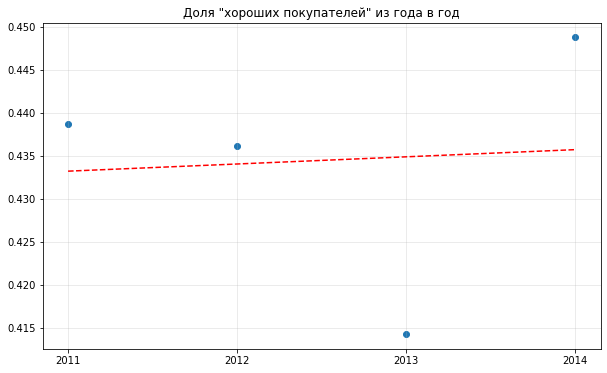

In [14]:
fraction_year_to_year = [fraction_2011, fraction_2012, fraction_2013, fraction_2014]
plt.figure(figsize=(10,6))
x = np.arange(2011, 2015, 1)
y = fraction_year_to_year
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.plot(x,p(x),"r--")

plt.xticks(np.arange(2011, 2015, 1))
plt.grid(alpha=0.3)
plt.title('Доля "хороших покупателей" из года в год')
plt.show()

_Доля "хороших" покупателей из квартала в квартал в 2012 году_

In [15]:
# используя предыдущую переменную, сортировка по 2012 году
df_good_2012 = df_orders_years.loc[df_orders_years['Year'] == 2012].copy()
# добавление столбца с кварталом
df_good_2012['Quarter'] = df_good_2012['Order Date'].dt.quarter
# подсчет доли "хороших" покупателей в 1 квартале
df_good_2012_1 = df_good_2012.loc[df_good_2012['Quarter'] == 1]
df_good_2012_1 = pd.DataFrame(df_good_2012_1.groupby('Customer ID')['Order ID'].count())
fraction_1 = len(df_good_2012_1.loc[df_good_2012_1['Order ID'] > 
                                       df_good_2012_1['Order ID'].mean()]) / len(df_good_2012_1)

In [16]:
# подсчет доли "хороших" покупателей в 2 квартале
df_good_2012_2 = df_good_2012.loc[df_good_2012['Quarter'] == 2]
df_good_2012_2 = pd.DataFrame(df_good_2012_2.groupby('Customer ID')['Order ID'].count())
fraction_2 = len(df_good_2012_2.loc[df_good_2012_2['Order ID'] > 
                                       df_good_2012_2['Order ID'].mean()]) / len(df_good_2012_2)

In [17]:
# подсчет доли "хороших" покупателей в 3 квартале
df_good_2012_3 = df_good_2012.loc[df_good_2012['Quarter'] == 3]
df_good_2012_3 = pd.DataFrame(df_good_2012_3.groupby('Customer ID')['Order ID'].count())
fraction_3 = len(df_good_2012_3.loc[df_good_2012_3['Order ID'] > 
                                       df_good_2012_3['Order ID'].mean()]) / len(df_good_2012_3)

In [18]:
# подсчет доли "хороших" покупателей в 4 квартале
df_good_2012_4 = df_good_2012.loc[df_good_2012['Quarter'] == 4]
df_good_2012_4 = pd.DataFrame(df_good_2012_4.groupby('Customer ID')['Order ID'].count())
fraction_4 = len(df_good_2012_4.loc[df_good_2012_4['Order ID'] > 
                                       df_good_2012_4['Order ID'].mean()]) / len(df_good_2012_4)

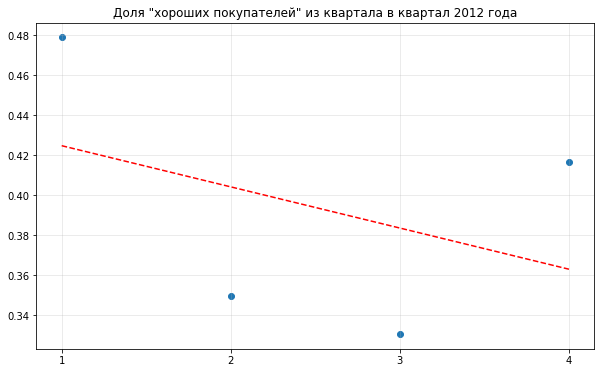

In [19]:
fraction_quarter_to_quarter = [fraction_1, fraction_2, fraction_3, fraction_4]
plt.figure(figsize=(10,6))
x = np.arange(1, 5, 1)
y = fraction_quarter_to_quarter
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.plot(x,p(x),"r--")

plt.xticks(np.arange(1, 5, 1))
plt.grid(alpha=0.3)
plt.title('Доля "хороших покупателей" из квартала в квартал 2012 года')
plt.show()

###### 9. Выбросы затрат на транспортировку из Канады в ящике с усами 

In [20]:
# сортировка датасета по Канаде
df_canada = df.loc[df['Country'] == 'Canada']
# определение выборки в виде затрат на транспортировку
df_canada_ship = df_canada['Shipping Cost']
# подсчет первого и третьего квартилей для ящика с усами
df_canada_ship = df_canada_ship.sort_values()
mediana = df_canada_ship.median()
df_q1 = df_canada_ship.loc[df_canada_ship < mediana]
q1 = df_q1.median()
df_q3 = df_canada_ship.loc[df_canada_ship > mediana]
q3 = df_q3.median()
# IQR
iqr = q3 - q1
# определение концов усов ящика
first_whisker = q1 - 1.5 * iqr
last_whisker = q3 + 1.5 * iqr
# подсчет числа выбросов
outliers_1 = df_canada_ship.loc[df_canada_ship < first_whisker].count()
outliers_2 = df_canada_ship.loc[df_canada_ship > last_whisker].count()
outliers = outliers_1 + outliers_2
print('Доля выбросов в общей выборке затрат на транспортировку из Канады:',
     round(outliers / len(df_canada_ship), 3))

Доля выбросов в общей выборке затрат на транспортировку из Канады: 0.132


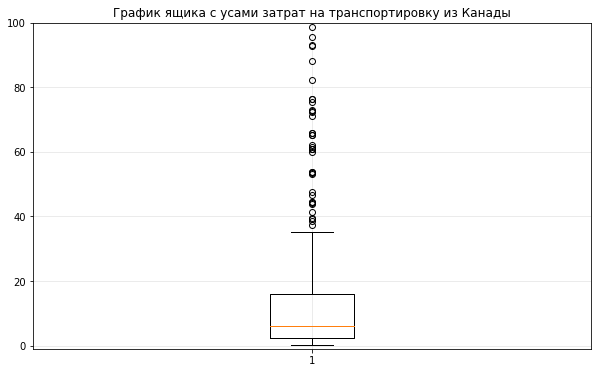

In [21]:
# график ящика с усами с ограничением оси y в 100
plt.figure(figsize=(10,6))
plt.boxplot(df_canada_ship)
plt.grid(alpha=0.3)
plt.ylim(-1,100)
plt.title('График ящика с усами затрат на транспортировку из Канады')
plt.show()

###### 10. Использование модели линейной регрессии для определения изменений в общей прибыли заказов из США

In [22]:
# сортировка датасета по США
df_usa = df.loc[df['Country'] == 'United States'].copy()
# добавление столбца с годом
df_usa['Year'] = df['Order Date'].dt.year
df_usa_grouped = df_usa.groupby('Year')['Profit'].sum()

In [23]:
# подсчет переменных в уравнение линейной регрессии для оценки прибыли в зависимости от года
x = df_usa_grouped.index.to_numpy() - 2011
y = df_usa_grouped.to_numpy()

sum_x = x.sum()
sum_y = y.sum()
sum_x2 = sum(x ** 2)
sum_xy = sum(x * y)

b = (4 * sum_xy - sum_x * sum_y) / (4 * sum_x2 - sum_x ** 2)
a = (sum_y - b * sum_x) / 4

In [24]:
print(f'Уравнение линейной регрессии выглядит следующим образом: Y = {a} * (X - 2011) + {b}')

Уравнение линейной регрессии выглядит следующим образом: Y = 48371.51671 * (X - 2011) + 15572.38861


In [25]:
# подсчет переменных в уравнение линейной регрессии для оценки измнения прибыли в зависимости от года
x = df_usa_grouped.index.to_numpy() - 2011
profits = df_usa_grouped.to_numpy()
prev_val = profits[0]
y = []
for val in profits:
    val1 = val / prev_val
    y.append(val1)
    prev_val = val
y = np.array(y) - 1

sum_x = x.sum()
sum_y = y.sum()
sum_x2 = sum(x ** 2)
sum_xy = sum(x * y)

b = (4 * sum_xy - sum_x * sum_y) / (4 * sum_x2 - sum_x ** 2)
a = (sum_y - b * sum_x) / 4
print(f'Уравнение линейной регрессии выглядит следующим образом: Y = {round(a, 3)} * (X - 2011) + {round(b, 3)}')

Уравнение линейной регрессии выглядит следующим образом: Y = 0.095 * (X - 2011) + 0.058
